# Maestría en "Analítica de datos"
---
Nombre: Luis Fernando Castellanos Guarin
Código: XXXX
Fecha: 2025 agosto 21
---
Descripción: este libro trabaja ejercicios básicos de bigData

# 1.Cargar y visualizar datos en Pandas

In [3]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url ="/content/drive/MyDrive/UniversidadCentral/Maestría_en_Analítica_de_Datos/Bigdata/DataSets_TMP/Historial_de_Multas_reportados_en_el_SIMIT_-_FCM_20250821.csv"
df  =pd.read_csv(url)

##1.1 Conocer la Data

In [5]:
pd.set_option('display.max_columns', None)  #muestre la tabla sin importar la cantidad de columnas
print(df.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA    DEPARTAMENTO        CIUDAD PAGADO_SI_NO
     2019 MIK715  25/01/2019     414,058       Santander   Bucaramanga           SI
     2020 IBF96B  11/02/2020           0            Meta Villavicencio           SI
     2020 AUW697  08/12/2020     877,803           Cauca    Mercaderes           NO
     2019 FCW577  11/03/2019     414,060       Antioquia      Medellin           SI
     2019 EVL11D  24/08/2019           0       Antioquia     Chigorodo           NO
     2021 FOR75D  09/08/2021     149,185 Valle del Cauca          Cali           SI
     2019 XKX76A  04/10/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 ELA11D  27/03/2019     414,060       Antioquia      Medellin           SI
     2019 TAY686  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100     Bogota D.C.   Bogota D.C.      

In [6]:
#mostrar la metadata (como estan clasificados los datos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25234188 entries, 0 to 25234187
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   object
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(1), object(6)
memory usage: 1.3+ GB
None


# 2.filtrado y selección

In [7]:
#seleccionar Bogota para el ejercicio de clase...tarea (hacerlo con sus ciudades de origen o de gusto)
df_bogota= df[df["DEPARTAMENTO"]=="Bogota D.C."]

print(df_bogota.head(20).to_string(index=False))
print(f"la cantidad de registro de Bogota D.C. es {df_bogota.shape[0]}")

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO      CIUDAD PAGADO_SI_NO
     2019 XKX76A  04/10/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 TAY686  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100  Bogota D.C. Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 JFK618  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2019 VDM981  13/03/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2020 IKX489  22/09/2020     234,100  Bogota D.C. Bogota D.C.           NO
     2021 EQZ167  01/03/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2021 IAU451  01/03/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2021 FNO652  15/10/2021     447,700  Bogota D.C. Bogota D.C.           SI
     2019 AIQ94F  06/05/2019     414,100  Bogota D.C. Bogota D.C.           SI
     2020 CDP093  15/01/2020     438,900  Bogota D.C

## 2.1 conocer la data

In [8]:
#obtener los datos unicos de las vigencias
print(df_bogota["VIGENCIA"].unique())

[2019 2020 2021 2023 2022]


In [9]:
# verificar si tenemos datos nulos
print(df_bogota.isnull().sum())
#eliminar filas con valores nulos (si existieran)
#df_bogota.dropna(inplace=True)

VIGENCIA          0
PLACA           112
FECHA_MULTA       0
VALOR_MULTA       0
DEPARTAMENTO      0
CIUDAD            0
PAGADO_SI_NO      0
dtype: int64


# 3.ETL
---
Limpieza y transformación de los datos:
1. borrado de registros con datos nulos,
2. Crear nuevas columnas
3. transformar columnas en datos reconocidos (números/texto/fechas/listas)




In [10]:
df_bogota['VALOR_MULTA'] = df_bogota['VALOR_MULTA'].astype(str).str.replace(',','',regex=False)
df_bogota['VALOR_MULTA'] = pd.to_numeric(df_bogota['VALOR_MULTA'], errors='coerce')

print(df_bogota.info())

/tmp/ipython-input-2140635896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['VALOR_MULTA'] = df_bogota['VALOR_MULTA'].astype(str).str.replace(',','',regex=False)


<class 'pandas.core.frame.DataFrame'>
Index: 3871898 entries, 6 to 19958139
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   int64 
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(2), object(5)
memory usage: 236.3+ MB
None


/tmp/ipython-input-2140635896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['VALOR_MULTA'] = pd.to_numeric(df_bogota['VALOR_MULTA'], errors='coerce')


In [11]:
df_bogota['PAGADO_SI_NO_NUM'] = df_bogota['PAGADO_SI_NO'].apply(lambda x: 1 if x == 'SI' else 0)
print(df_bogota.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3871898 entries, 6 to 19958139
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   VIGENCIA          int64 
 1   PLACA             object
 2   FECHA_MULTA       object
 3   VALOR_MULTA       int64 
 4   DEPARTAMENTO      object
 5   CIUDAD            object
 6   PAGADO_SI_NO      object
 7   PAGADO_SI_NO_NUM  int64 
dtypes: int64(3), object(5)
memory usage: 265.9+ MB
None


/tmp/ipython-input-2617707637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['PAGADO_SI_NO_NUM'] = df_bogota['PAGADO_SI_NO'].apply(lambda x: 1 if x == 'SI' else 0)


In [12]:
print(df_bogota.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO      CIUDAD PAGADO_SI_NO  PAGADO_SI_NO_NUM
     2019 XKX76A  04/10/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 TAY686  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 BPI174  13/03/2019       414100  Bogota D.C. Bogota D.C.           NO                 0
     2019 FLM417  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 JFK618  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2019 VDM981  13/03/2019       414100  Bogota D.C. Bogota D.C.           SI                 1
     2020 IKX489  22/09/2020       234100  Bogota D.C. Bogota D.C.           NO                 0
     2021 EQZ167  01/03/2021       447700  Bogota D.C. Bogota D.C.           SI                 1
     2021 IAU451  01/03/2021       447700  Bogota D.C. Bogota D.C.           SI                 1
     2021 FNO652  15

# 4.Agregación y estadísticas descriptivas
---
*  (filtros/acumulados)
*  funciones básicas de panda

In [14]:
#estadísticas descriptivas con VALOR_MULTA
with pd.option_context('display.float_format', '{:f}'.format):
  print(df_bogota['VALOR_MULTA'].describe())

#calcular el promedio de multas por vigencia (año)
multas_promedio_por_vigencia = df_bogota.groupby('VIGENCIA')['VALOR_MULTA'].mean()
print(multas_promedio_por_vigencia)

count    3871898.000000
mean      503016.944097
std       213851.704528
min            0.000000
25%       438900.000000
50%       468500.000000
75%       522900.000000
max     39749600.000000
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    422810.607262
2020    452831.633270
2021    474441.471548
2022    512833.481526
2023    570499.032588
Name: VALOR_MULTA, dtype: float64


# 5.Análisis avanzados

In [17]:
#tabla para ver el porcentajes de multas pagas (si/no) por vigencia
multas_counts = df_bogota.groupby(['VIGENCIA', 'PAGADO_SI_NO']).size().unstack(fill_value=0)
multas_counts['TOTAL'] = multas_counts.sum(axis=1)
multas_porcentaje= multas_counts.div(multas_counts['TOTAL'], axis=0) * 100
print("porcentaje de multas pagadas por vigencia(año)")
print(multas_porcentaje)

porcentaje de multas pagadas por vigencia(año)
PAGADO_SI_NO         NO         SI  TOTAL
VIGENCIA                                 
2019          18.756310  81.243690  100.0
2020          36.388183  63.611817  100.0
2021          46.878995  53.121005  100.0
2022          52.303577  47.696423  100.0
2023          53.837937  46.162063  100.0


# 6. visualización de datos
---
matplotlib y seaborn

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

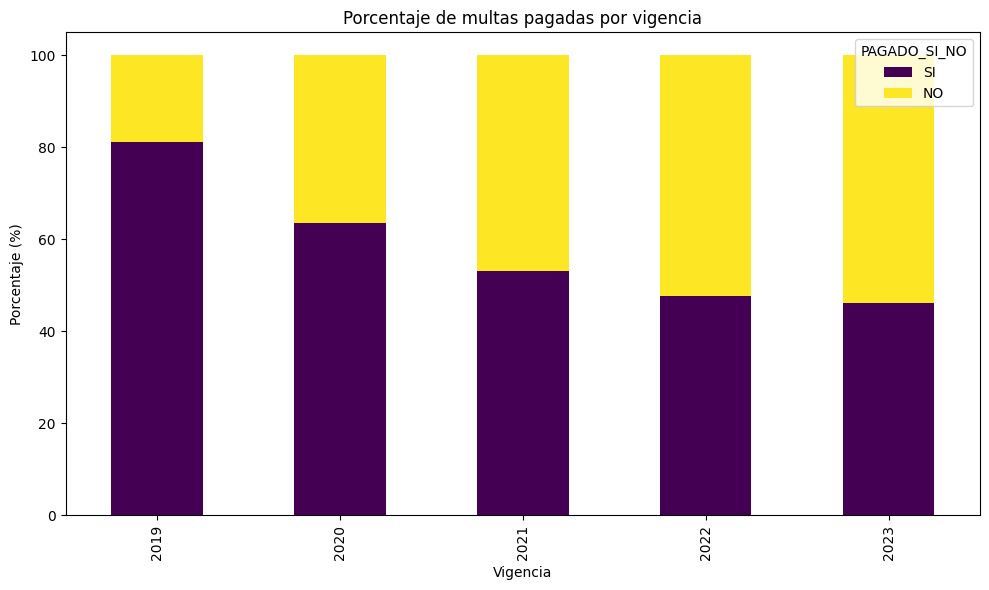

In [22]:
multas_porcentaje [['SI','NO']].plot(kind='bar',stacked=True,figsize=(10,6),colormap='viridis')
plt.title('Porcentaje de multas pagadas por vigencia')
plt.xlabel('Vigencia')
plt.ylabel('Porcentaje (%)')
plt.tight_layout()
plt.show()

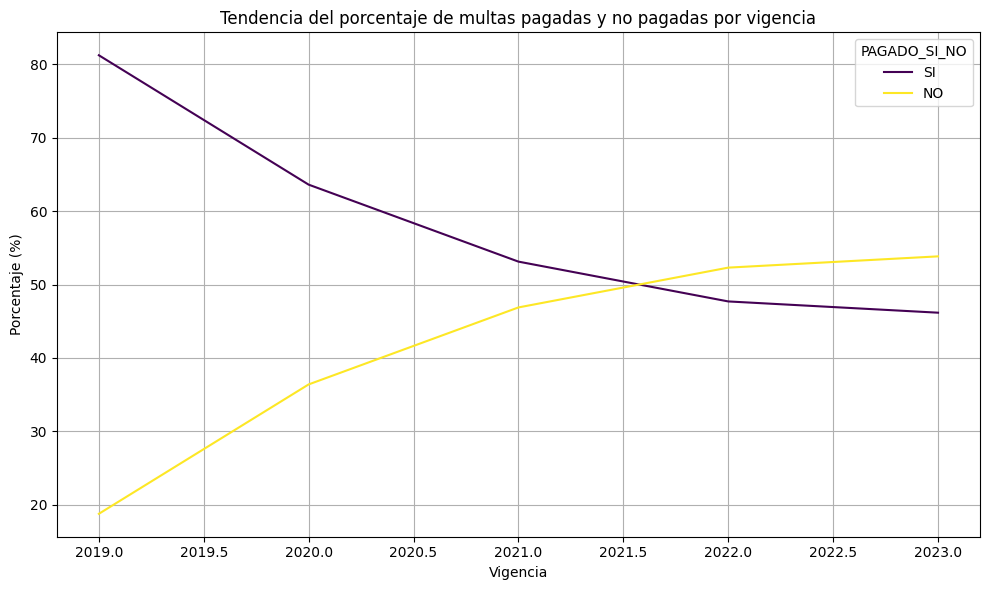

In [21]:
multas_porcentaje[['SI', 'NO']].plot(kind='line', figsize=(10, 6), colormap='viridis')
plt.title('Tendencia del porcentaje de multas pagadas y no pagadas por vigencia')
plt.xlabel('Vigencia')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.tight_layout()
plt.show()